In [80]:
#https://pandas.pydata.org/pandas-docs/stable/api.html
import pandas as pd
from sklearn.datasets import load_boston
dataset = load_boston()

In [79]:
#1-Mostre os primeiros registros da tabela
data = pd.read_csv(dataset.filename, header=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [134]:
#2-Observações(linhas) possui nessa base? Quantas Colunas?
data.shape

(506, 14)

In [159]:
#3-Quantas Features Possui?
dataset.feature_names.size

13

In [160]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [161]:
#4-Qual é o campo Target(respostas) dessa base?
#MEDV

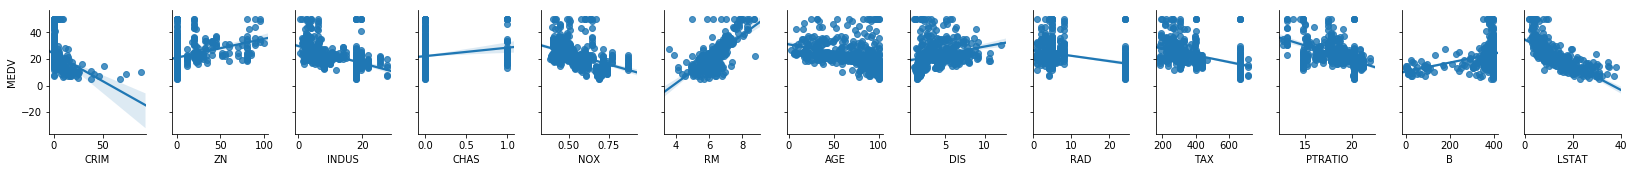

In [168]:
#5-Usando a biblioteca de visualização seaborn, plote o gráfico que mostra a relação entre as features e responses
import seaborn as sns
%matplotlib inline
sns.pairplot(data, x_vars=['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], 
             y_vars='MEDV', aspect=0.7, kind='reg')

In [187]:
#Prepare X e y usando o pandas
feature_cols = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = data[feature_cols]
y = data['MEDV']

In [177]:
#7-Qual o tipo de dados de X e y?
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [194]:
#8-Sobre o que se trata essa base de dados? Que tipo de informações ela guarda?
dataset.DESCR
#Boston house prices dataset

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [179]:
#9-Gere um X de treino e y de treino, X de teste e y da base (Split Train/Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [180]:
#10-Qual o percentual gerado para criar o conjunto de treino e o conjunto de teste?
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 13)
(379,)
(127, 13)
(127,)


In [181]:
#11-Usando modelo de regressão linear do sklearn, treine o modelo com o X e y de treino
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [182]:
#12-Imprima os atributos de "intercept" e "coefficients" que foram gerados
print(linreg.intercept_)
print(linreg.coef_)

45.19251538838385
[-1.14428903e-01  5.71299780e-02  3.83002824e-02  2.42854641e+00
 -2.12326236e+01  2.87723416e+00  6.91118094e-03 -1.47158266e+00
  3.05784197e-01 -1.06750361e-02 -9.96138270e-01  6.27746234e-03
 -5.57414427e-01]


In [188]:
#13-imprima o par "feature names" com os "coefficients"
list(zip(feature_cols, linreg.coef_))

[('CRIM', -0.11442890306628536),
 ('ZN', 0.05712997804799092),
 ('INDUS', 0.03830028239367774),
 ('CHAS', 2.428546408201779),
 ('NOX', -21.232623560528438),
 ('RM', 2.877234156006178),
 ('AGE', 0.006911180936369624),
 ('DIS', -1.4715826611839458),
 ('RAD', 0.3057841971271474),
 ('TAX', -0.010675036077892247),
 ('PTRATIO', -0.9961382695506964),
 ('B', 0.006277462341291985),
 ('LSTAT', -0.5574144267109911)]

In [189]:
#14-Faça uma previsão usando o conjunto de X de teste
y_pred = linreg.predict(X_test)

In [198]:
#15-Mostre a margem de error, usando o método "Root Mean Squared Error (RMSE)"
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.679504823808768


In [210]:
#16-Existe uma forma de melhorar essa margem para que fique menor? Se sim, como seria?
#Sim, removendo o 'NOX'
#['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
feature_cols = ['CRIM','ZN','INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = data[feature_cols]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.605696571225638
